In [11]:
from apportionment import *

import datetime
import pywt
from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 

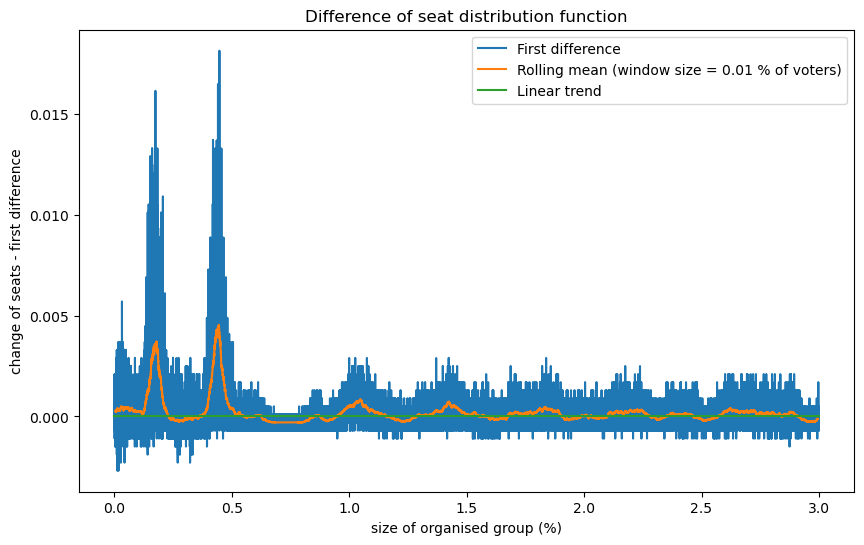

4446
1794


In [19]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-large.csv")

plt.figure(figsize=(10, 6))

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats - first difference')
plt.title('Difference of seat distribution function')

plt.legend()
plt.show()

max_index = y_rolling.idxmax()
print(max_index)

max_index = y_rolling[:3000].idxmax()
print(max_index)


In [23]:
X, y = x_values, y_rolling


array([0.        , 0.00024794, 0.00026792, ..., 0.        , 0.        ,
       0.        ])

array([0.02374582, 0.02808048, 0.02797979, ..., 2.80368463, 3.04757897,
       2.84774173])

Text(0, 0.5, 'Fourier Amplitude')

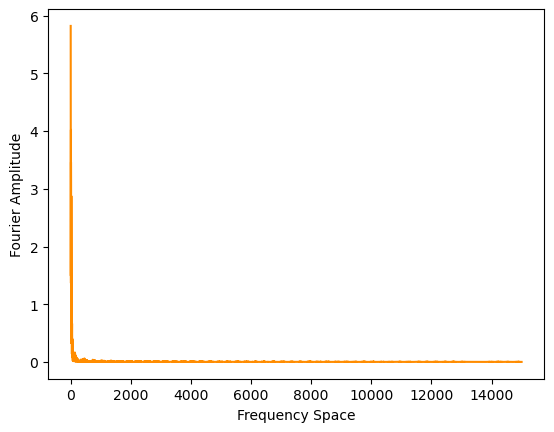

In [29]:
signal = np.nan_to_num(y, nan=0)
display(signal[50:])
fft_signal = np.abs(np.fft.fft(signal))
display(fft_signal[500:])
plt.plot(fft_signal[0:int(len(signal)/2.)],color='darkorange')
plt.xlabel('Frequency Space')
plt.ylabel('Fourier Amplitude')

In [31]:
# src https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(X)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(x_values)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(X)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

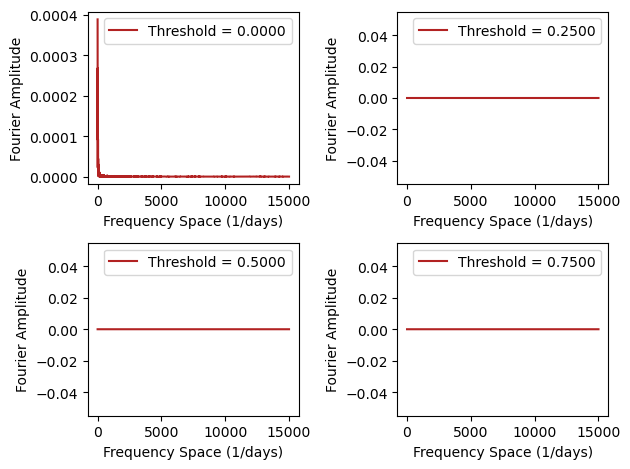

In [38]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.4f'%(th_list[i]))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

ValueError: x and y must have same first dimension, but have shapes (4,) and (30000,)

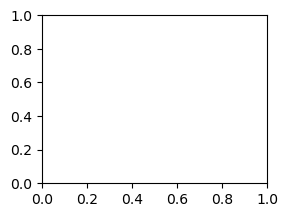

In [39]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()